# прогнозирование оттока клиентов банка

**Задача**
<br>
Построить модель классификации для предсказания ухода клиента из банка. Метрика модели "F1-мера" должна быть не менее 0,59.

## Подготовка данных

In [1]:
#Импортируем библиотеки и модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.utils import shuffle

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
#Создаём датасет из csv-файла
df = pd.read_csv('/datasets/Churn.csv')

In [4]:
#Выводим первые 10 строк датасета
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#Выводи информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


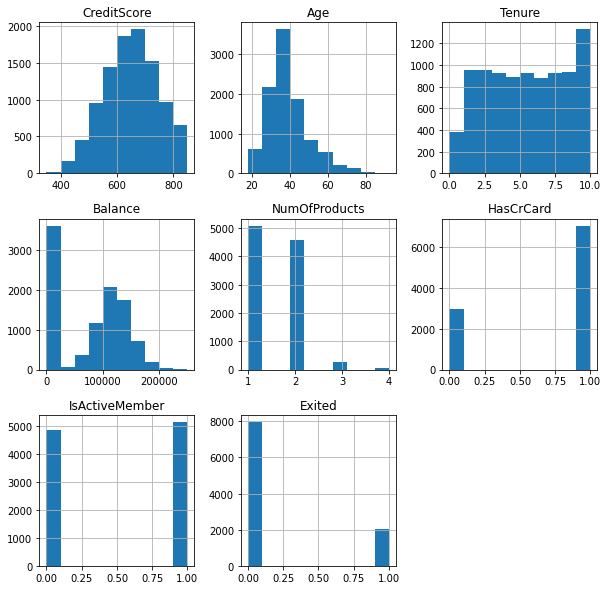

In [5]:
#Строим гистограммы столбцов
df.hist(column=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], figsize=(10, 10));

In [6]:
#Выводим числовое описание данных всех столбцов для ознакомления
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
#Выводим количество пропусков
pd.DataFrame(df.isna().mean()).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,0.090900
Balance,0.000000
NumOfProducts,0.000000


In [8]:
#Выводим уникальные значения столбца 'Tenure'
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [9]:
#Выводим количество уникальных значений столбца 'Tenure'
print(df['Tenure'].value_counts())
print(df['Tenure'].isna().sum())

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
909


In [10]:
#Заменяем пустые значения в столбце 'Tenure' на 'Неизвестно'
df.loc[df['Tenure'].isna(), 'Tenure'] = 'Неизвестно'

In [11]:
#Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  object 
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.1+ MB


### Применим прямое кодирование техникой OHE

In [12]:
#Сначала уберём ненужные признаки
df_ohe = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [13]:
#Выводим датасет для проверки
df_ohe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [14]:
#Применяем прямое кодирование OHE
df_ohe = pd.get_dummies(df_ohe, drop_first=True)

In [15]:
#Выводим датасет для проверки
df_ohe

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Tenure_Неизвестно
0,619,42,0.00,1,1,1,101348.88,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,3,1,0,113931.57,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,1,0,96270.64,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9996,516,35,57369.61,1,1,1,101699.77,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,709,36,0.00,1,0,1,42085.58,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9998,772,42,75075.31,2,1,0,92888.52,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [16]:
#Выделяем признаки и целевой признак
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'], axis=1)

In [17]:
#Выводим уникальные значения столбца 'target'
target.unique()

array([1, 0], dtype=int64)

In [18]:
#Разделим датасет на две выборки: обучающую размером 60% и остальную размером 40% 
features_train, features_40, target_train, target_40 = train_test_split(features, target, test_size=0.4, random_state=12345) 

In [19]:
#Выводим размер обчающей выборки
print(features_train.shape)
print(target_train.shape)

(6000, 21)
(6000,)


In [20]:
#Выделяем валидационную и тестовую выборки из выборки в 40% путём деления этой выборки на 2
features_valid, features_test, target_valid, target_test = train_test_split(features_40, target_40, test_size=0.5, random_state=12345) 

In [21]:
#Выводим размер валидационной выборки
print(features_valid.shape)
print(target_valid.shape)

(2000, 21)
(2000,)


In [22]:
#Выводим размеры тестовой выборки
print(features_test.shape)
print(target_test.shape)

(2000, 21)
(2000,)


In [23]:
#Выведем доли от датасета для обучающей, валидационной и тестовой выборки для проверки
print(len(features_train)/len(df))
print(len(features_valid)/len(df))
print(len(features_test)/len(df))

0.6
0.2
0.2


Разделение датасета на выборки прошло корректно

### Стандартизируем численные признаки

In [24]:
#Создадим список численных признаков
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [25]:
#Создадим StandardScaler и настроим его на обучющей выборке
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [26]:
#Преобразуем выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

### Исследуем баланс классов в целевом признаке

0    0.7963
1    0.2037
Name: Exited, dtype: float64


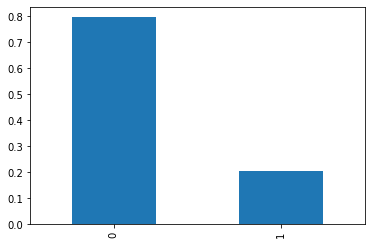

In [27]:
#Для подсчёта классов в целевом признаке примените метод value_counts()
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Вывод: В целевом признаке наблюдаем дисбаланс классов

### Обучим разные модели без учёта дисбаланса классов. Выберем лучшую модель по макс. значению F1-меры.

**Решающее дерево**

In [28]:
#Создаём функцию для поиска гиперпараметров решающего дерева с макс. значением F1-меры с аргументами: 
#обуч. выборка, целевой признак, проверочная выборка, целевой признак, max_depth, class_weight
def best_tree(f_train, t_train, f_result, t_result, depth, cw):
    best_f1 = 0
    for i in range(1, depth):
        model = DecisionTreeClassifier(max_depth=i, random_state=12345, class_weight=cw)
        model.fit(f_train, t_train)
        predicted_result = model.predict(f_result)
        f1 = f1_score(t_result, predicted_result)
        #print('max_depth =',i,', F1-мера =', f1)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = i
    print("F1-мера наилучшей модели =", best_f1, ", max_depth:", best_depth)

In [29]:
#Найдём гиперпараметры модели "Решающее дерево" с максимальный значением F1 с помощью функции
best_tree(features_train, target_train, features_valid, target_valid, 21, None)

F1-мера наилучшей модели = 0.5753424657534246 , max_depth: 6


Построим ROC-кривую и посчитаем метрику AUC-ROC

In [30]:
#Создаём функцию, которая будет строить ROC-кривую и считать значение AUC-ROC 
#с аргументами: обученная модель, проверочная выборка, целевой признак
def auc_roc(m, f, t):
    probabilities = m.predict_proba(f)
    probabilities_one = probabilities[:, 1]
    fpr, tpr, thresholds = roc_curve(t, probabilities_one)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show() 
    print("AUC-ROC:", roc_auc_score(t, probabilities_one))

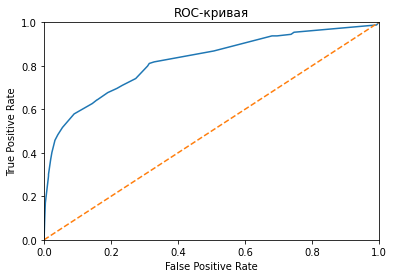

AUC-ROC: 0.8208448514689781


In [31]:
#Строим ROC-кривую и считаем значение AUC-ROC для решающего дерева с найденными выше гиперпараметрами
model = DecisionTreeClassifier(max_depth=6, random_state=12345, class_weight=None)
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

**Случайный лес**

In [32]:
#Создаём функцию для поиска гиперпараметров случайного леса с макс. значением F1-меры с аргументами: 
#обуч. выборка, целевой признак, проверочная выборка, целевой признак, max_depth, n_estimators, class_weight
def best_forest(f_train, t_train, f_result, t_result, depth, est, cw):
    best_depth = 0
    best_est = 0
    best_f1 = 0
    for i in range(1, depth, 1):
        for j in range(10, est, 10):
            model = RandomForestClassifier(n_estimators=j, max_depth=i, class_weight = cw, random_state=12345)
            model.fit(f_train, t_train)
            predicted_result = model.predict(f_result)
            f1 = f1_score(t_result, predicted_result)
            #print("max_depth: {:.0f}, n_estimators: {:.0f}, F1-мера = {:.3f}".format(i, j, f1))
            if f1 > best_f1:
                best_f1 = f1
                best_depth = i
                best_est = j
    print("F-1 мера = {:.4f}, max_depth: {:.0f}, n_estimators: {:.0f}".format(best_f1, best_depth, best_est))

In [33]:
%%time
#Найдём гиперпараметры модели "Случайный лес" с максимальный значением F1 с помощью функции
best_forest(features_train, target_train, features_valid, target_valid, 20, 101, None)

F-1 мера = 0.5930, max_depth: 17, n_estimators: 70
CPU times: total: 1min 19s
Wall time: 1min 20s


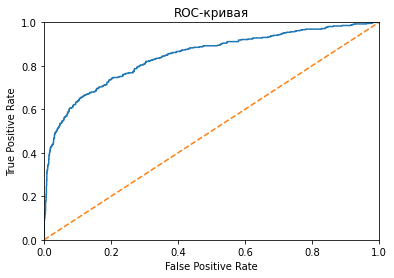

AUC-ROC: 0.8442080160175176


In [34]:
#Строим ROC-кривую и считаем значение AUC-ROC для случайного леса с найденными выше гиперпараметрами
model = RandomForestClassifier(n_estimators=70, max_depth=17, class_weight = None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

**Логистическая регресия**

In [35]:
#Создаём функцию для поиска гиперпараметров логистической регрессии с макс. значением F1-меры с аргументами: 
#обуч. выборка, целевой признак, проверочная выборка, целевой признак, max_iter, class_weight
def best_regression(f_train, t_train, f_result, t_result, iter, cw):
    best_f1 = 0
    #Создадим цикл, в котором гиперпараметр max_iter будет принимать значения переменной цикла i
    for i in range(10, iter, 10):
        model = LogisticRegression(solver='liblinear', max_iter=i, class_weight=cw, random_state=12345)
        model.fit(f_train, t_train)
        predicted_result = model.predict(f_result)
        f1 = f1_score(t_result, predicted_result)
        print('max_iter:',i,', F1-мера:', f1)
        if f1 > best_f1:
            best_f1 = f1
            best_iter = i
    print("F-1 мера = {:.4f}, max_iter: {:.0f}".format(best_f1, best_iter))

In [36]:
#Найдём гиперпараметры модели "Логистическая регрессия" с максимальный значением F1 с помощью функции
best_regression(features_train, target_train, features_valid, target_valid, 501, None)

max_iter: 10 , F1-мера: 0.32605042016806723
max_iter: 20 , F1-мера: 0.32605042016806723
max_iter: 30 , F1-мера: 0.32605042016806723
max_iter: 40 , F1-мера: 0.32605042016806723
max_iter: 50 , F1-мера: 0.32605042016806723
max_iter: 60 , F1-мера: 0.32605042016806723
max_iter: 70 , F1-мера: 0.32605042016806723
max_iter: 80 , F1-мера: 0.32605042016806723
max_iter: 90 , F1-мера: 0.32605042016806723
max_iter: 100 , F1-мера: 0.32605042016806723
max_iter: 110 , F1-мера: 0.32605042016806723
max_iter: 120 , F1-мера: 0.32605042016806723
max_iter: 130 , F1-мера: 0.32605042016806723
max_iter: 140 , F1-мера: 0.32605042016806723
max_iter: 150 , F1-мера: 0.32605042016806723
max_iter: 160 , F1-мера: 0.32605042016806723
max_iter: 170 , F1-мера: 0.32605042016806723
max_iter: 180 , F1-мера: 0.32605042016806723
max_iter: 190 , F1-мера: 0.32605042016806723
max_iter: 200 , F1-мера: 0.32605042016806723
max_iter: 210 , F1-мера: 0.32605042016806723
max_iter: 220 , F1-мера: 0.32605042016806723
max_iter: 230 , F1-

Параметр max_iter не вляет на значение F-1 меры, упростим функцию, исключив изменение этого параметра

In [37]:
def best_regression(f_train, t_train, f_result, t_result, cw):
    f1 = 0
    model = LogisticRegression(solver='liblinear', class_weight=cw, random_state=12345)
    model.fit(f_train, t_train)
    predicted_result = model.predict(f_result)
    f1 = f1_score(t_result, predicted_result)
    print("F-1 мера = {:.4f}".format(f1))

In [38]:
#Найдём гиперпараметры модели "Логистическая регрессия" с максимальный значением F1 с помощью функции
best_regression(features_train, target_train, features_valid, target_valid, None)

F-1 мера = 0.3261


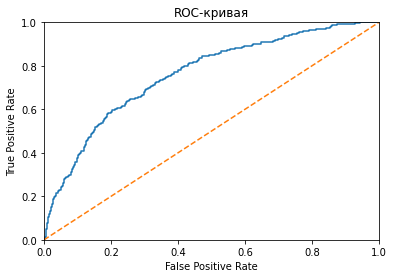

AUC-ROC: 0.759840066779983


In [39]:
#Строим ROC-кривую и считаем значение AUC-ROC для логистической регрессии
model = LogisticRegression(solver='liblinear', class_weight=None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

Вывод: Лучшее значение F1-меры показала модель "Случайный лес" с параметрами n_estimators = 70 и max_depth = 17.

## Борьба с дисбалансом

### Обучим модели со сбалансированными весами классов

**Решающее дерево**

In [40]:
#Выводим значение F1- меры Решающего дерева с найденными выше гиперпараметрами без учёта дисбаланса классов
best_tree(features_train, target_train, features_valid, target_valid, 21, None)

F1-мера наилучшей модели = 0.5753424657534246 , max_depth: 6


In [41]:
#Найдём максимальное знач-е F1-меры со сбалансированными весами классов
best_tree(features_train, target_train, features_valid, target_valid, 21, 'balanced')

F1-мера наилучшей модели = 0.5948827292110873 , max_depth: 5


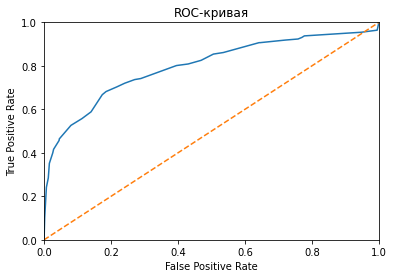

AUC-ROC: 0.7972745117016193


In [42]:
#Строим ROC-кривую и считаем значение AUC-ROC для решающего дерева со сбалансированными весами классов
model = DecisionTreeClassifier(max_depth=6, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

**Случайный лес**

Найденые выше макс. значение F1-меры и гиперпараметры Случайного леса без учёта дисбаланса:<br>
F-1 мера = 0.5930, max_depth: 17, n_estimators: 70

In [43]:
%%time
#Найдём гиперпараметры модели "Случайный лес" с максимальный значением F1 со сбалансированными весами классов
best_forest(features_train, target_train, features_valid, target_valid, 20, 101, 'balanced')

F-1 мера = 0.6371, max_depth: 9, n_estimators: 60
CPU times: total: 1min 21s
Wall time: 1min 24s


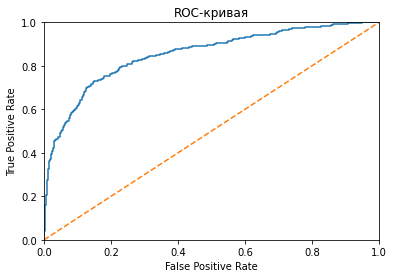

AUC-ROC: 0.8530190117288394


In [44]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Случайного леса" со сбалансированными весами классов
model = RandomForestClassifier(n_estimators=60, max_depth=9, class_weight = 'balanced', random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

**Логистическая регрессия**

In [45]:
#Выводим начение F1-меры для "Логистической регрессии" без учёта дисбаланса классов
best_regression(features_train, target_train, features_valid, target_valid, None)

F-1 мера = 0.3261


In [46]:
#Выводим начение F1-меры для "Логистической регрессии" со сбалансированными весами классов
best_regression(features_train, target_train, features_valid, target_valid, 'balanced')

F-1 мера = 0.4897


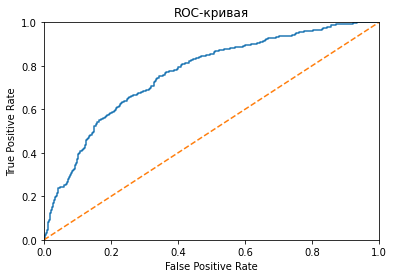

AUC-ROC: 0.7642618210852958


In [47]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Логистической регрессии" со сбалансированными весами классов
model = LogisticRegression(class_weight = 'balanced', random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_valid, target_valid)

**Вывод**: Со сбалансированными весами классов (гиперпараметр class_weight = 'balanced') лучшее значение F1-меры на валидационной выборке - 0.6371 показала модель "Случайный лес" с гиперпараметрами max_depth = 9 и n_estimators = 60

### Применим технику увеличения выборки - upsampling

In [48]:
#Создаём функцию увеличения обучающей выборки для балансировки весов классов с аргументами:
#признаки, целевой признак, множитель
def upsample(features, target, repeat):
    features_zeros = features[target == 0] #признаки объектов с ответом 0
    features_ones = features[target == 1] #признаки объектов с ответом 1
    target_zeros = target[target == 0] #целевой признак объектов, у которых ответы только 0
    target_ones = target[target == 1] #целевой признак объектов, у которых ответы только 1

    #Добавляем к признакам с ответом 0 признаки с ответом 1, умноженные на множитель для уравнивания дисбаланса классов
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    # - то-же с целевыми признаками
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    #Перемешиваем увеличенную выборку
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [49]:
#Увеличиваем долю признаков и целевого признака с ответом 1 в 4 раза
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [50]:
#Выведем размер увеличенной выборки
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 21)
(9588,)


0    0.501043
1    0.498957
Name: Exited, dtype: float64


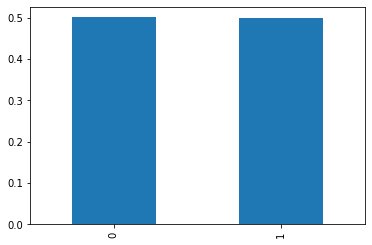

In [51]:
#Для подсчёта классов в целевом признаке примените метод value_counts()
class_frequency = target_upsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Увеличение выборки пришло корректно, дисбаланс классов устранён

#### Обучим модели на увеличенной выборке и найдём максимальное значение F1-меры

**Решающее дерево**

In [52]:
#Находим максимальное значение F1-меры на увеличенной выборке
best_tree(features_upsampled, target_upsampled, features_valid, target_valid, 21, None)

F1-мера наилучшей модели = 0.5948827292110873 , max_depth: 5


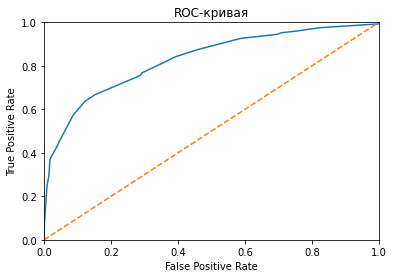

AUC-ROC: 0.8286804602011868


In [53]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Решающего дерева", обученного на увеличенной выборке
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight=None)
model.fit(features_upsampled, target_upsampled)
auc_roc(model, features_valid, target_valid)

**Случайный лес**

In [54]:
%%time
#Находим максимальное значение F1-меры на увеличенной выборке
best_forest(features_upsampled, target_upsampled, features_valid, target_valid, 20, 101, None)

F-1 мера = 0.6392, max_depth: 14, n_estimators: 50
CPU times: total: 1min 43s
Wall time: 1min 45s


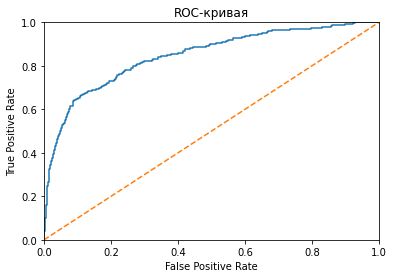

AUC-ROC: 0.8468279508102515


In [55]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Случайного леса", обученного на увеличенной выборке
model = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=12345, class_weight=None)
model.fit(features_upsampled, target_upsampled)
auc_roc(model, features_valid, target_valid)

**Логистическая регрессия**

In [56]:
#Находим значение F1-меры для "Логистическо1 регрессии", обученной на увеличенной выборке
best_regression(features_upsampled, target_upsampled, features_valid, target_valid, None)

F-1 мера = 0.4901


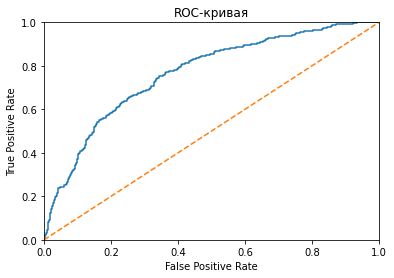

AUC-ROC: 0.7642225031605563


In [57]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Логистической регрессии", обученной на увеличенной выборке
model = LogisticRegression(solver='liblinear', class_weight=None)
model.fit(features_upsampled, target_upsampled)
auc_roc(model, features_valid, target_valid)

**Вывод**: Спомощью техники увеличения выборки лучшее значение F1-меры на валидационной выборке - 0.6392 показала модель "Случайный лес" со следующими гиперпарметрами: max_depth = 14, n_estimators = 50

### Применим технику уменьшения выборки - downsampling

In [58]:
#Создаём функцию уменьшения обучающей выборки для балансировки весов классов с аргументами:
#признаки, целевой признак, доля
def downsample(features, target, fraction):
    features_zeros = features[target == 0] #признаки объектов с ответом 0
    features_ones = features[target == 1] #признаки объектов с ответом 1
    target_zeros = target[target == 0] #целевой признак объектов, у которых ответы только 0
    target_ones = target[target == 1] #целевой признак объектов, у которых ответы только 1

    #Удаляем часть из признаков с ответом 0 с сохранением доли и прибавляем к ним признаки с ответом 1 
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    # тоже для целевых признаков
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    #Перемешиваем уменьшенную выборку
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [59]:
#Уменьшаем долю признаков и целевого признака с ответом 0 в 4 раза
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [60]:
#Выведем размер уменьшенной выборки
print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 21)
(2397,)


0    0.501043
1    0.498957
Name: Exited, dtype: float64


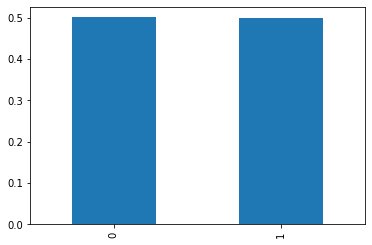

In [61]:
#Проверим баланс классов в уменьшенной выборке
class_frequency = target_downsampled.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Уменьшение выборки пришло корректно, дисбаланс классов устранён

#### Обучим модели на уменьшенной выборке и найдём максимальное значение F1-меры

**Решающее дерево**

In [62]:
#Находим максимальное значение F1-меры на уменьшенной выборке
best_tree(features_downsampled, target_downsampled, features_valid, target_valid, 21, None)

F1-мера наилучшей модели = 0.592292089249493 , max_depth: 5


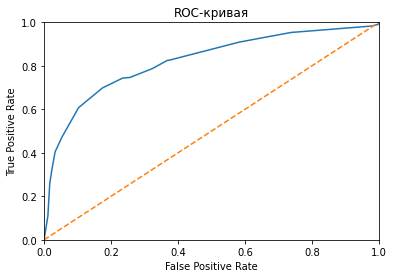

AUC-ROC: 0.8211329308790885


In [63]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Решающего дерева", обученного на уменьшенной выборке
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight=None)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_valid, target_valid)

**Случайный лес**

In [64]:
%%time
#Находим максимальное значение F1-меры на уменьшенной выборке
best_forest(features_downsampled, target_downsampled, features_valid, target_valid, 20, 101, None)

F-1 мера = 0.6049, max_depth: 9, n_estimators: 80
CPU times: total: 47.3 s
Wall time: 49.1 s


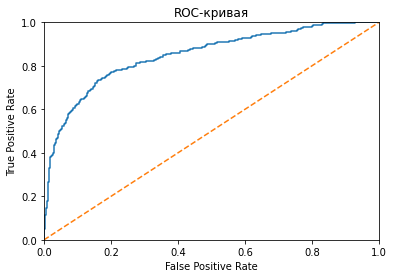

AUC-ROC: 0.8490327790514097


In [65]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Случайного леса", обученного на уменьшенной выборке
model = RandomForestClassifier(n_estimators=80, max_depth=9, random_state=12345, class_weight=None)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_valid, target_valid)

**Логистическая регрессия**

In [66]:
#Находим значение F1-меры на уменьшенной выборке
best_regression(features_downsampled, target_downsampled, features_valid, target_valid, None)

F-1 мера = 0.4824


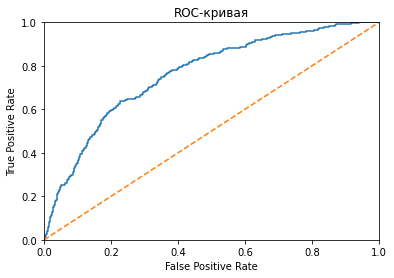

AUC-ROC: 0.7623745606978025


In [67]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Логистической регрессии", обученной на уменьшенной выборке
model = LogisticRegression(random_state=12345, class_weight=None)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_valid, target_valid)

**Вывод**: Спомощью техники уменьшения выборки лучшее значение F1-меры на валидационной выборке - 0.6049 показала модель "Случайный лес" со следующими гиперпарметрами: max_depth = 9, n_estimators = 80

### Применим технику изменения порога классификации

In [68]:
#Создадим функцию, которая будет выводить значе-е F1-меры и порог для этого значения
#Аргументы функции: обученная модель, проверочная выборка, целевой признак
def best_threshold(m, f_result, t_result):
    best_f1 = 0
    best_threshold = 0
    probabilities_result = model.predict_proba(f_result)
    probabilities_one_result = probabilities_result[:, 1]

    for threshold in np.arange(0, 0.5, 0.02):
        predicted_result = probabilities_one_result > threshold
        f1 = f1_score(t_result, predicted_result)
        #print("Порог: {:.2f}, F1 = {:.4f}".format(threshold,f1))
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    print("Масимальная F1-мера = {:.4f}, Порог: {:.2f}".format(best_f1, best_threshold))

**Решающее дерево**

In [69]:
#Находим макс. знач-е F1-меры и порог для этого значения. Возьмём гиперпараметры модели, с которыми было найдено
#макс. знач-е F1-меры с class_weight='balanced'
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
best_threshold(model, features_valid, target_valid)

Масимальная F1-мера = 0.5949, Порог: 0.46


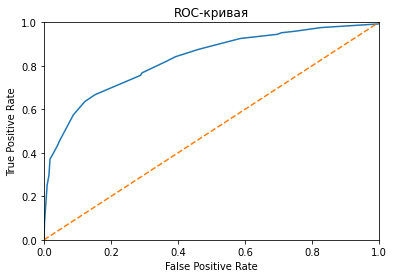

AUC-ROC: 0.7575626516008444


In [70]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Решающего дерева" с изменённым порогом классификации
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.46

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))

**Случайный лес**

In [71]:
#Находим макс. знач-е F1-меры и порог для этого значения. Возьмём гиперпараметры модели, с которыми было найдено
#макс. знач-е F1-меры с class_weight='balanced'
model = RandomForestClassifier(n_estimators = 60, max_depth=9, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
best_threshold(model, features_valid, target_valid)

Масимальная F1-мера = 0.6347, Порог: 0.48


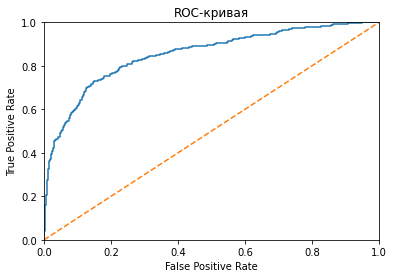

AUC-ROC: 0.7890472359498909


In [72]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Случайного леса" с изменённым порогом классификации
model = RandomForestClassifier(n_estimators = 60, max_depth=9, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.48

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))

**Логистическая регрессия**

In [73]:
#Находим макс. знач-е F1-меры и порог для этого значения
model = LogisticRegression(solver='liblinear', class_weight=None, random_state=12345)
model.fit(features_train, target_train)
best_threshold(model, features_valid, target_valid)

Масимальная F1-мера = 0.5035, Порог: 0.26


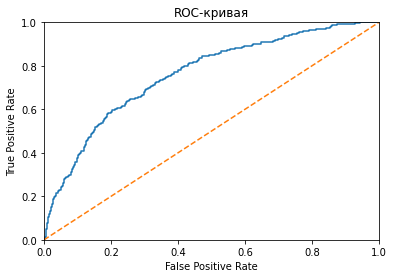

AUC-ROC: 0.6960769784477284


In [74]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Логистической регрессии" с изменённым порогом классификации
model = LogisticRegression(solver='liblinear', class_weight=None, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.26

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_valid, predicted_valid))

**Вывод**: С помощью техники изменения порога классификации лучшее значение F1-меры на валидационной выборке - 0.6347 показала модель "Случайный лес" со следующими гиперпарметрами: max_depth = 9, n_estimators = 60, с порогом классификации 0.48<br><br>
Максимального значения F1-меры в F-1 мера = 0.6392 удалось достичь с помощью техники увеличения выборки (upsampling) с моделью "Случайный лес" со следующими гиперпараметрами: max_depth = 14, n_estimators = 50

## Тестирование модели

**Решающее дерево**

In [75]:
#Без учёта дисбаланса
best_tree(features_train, target_train, features_test, target_test, 21, None)

F1-мера наилучшей модели = 0.5284178187403993 , max_depth: 6


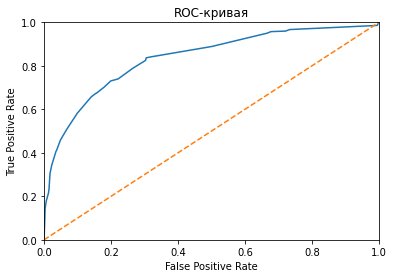

AUC-ROC: 0.8357708549764569


In [76]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = DecisionTreeClassifier(max_depth=6, class_weight=None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [77]:
#Со сбалансированными весами классов
best_tree(features_train, target_train, features_test, target_test, 21, 'balanced')

F1-мера наилучшей модели = 0.5809128630705395 , max_depth: 5


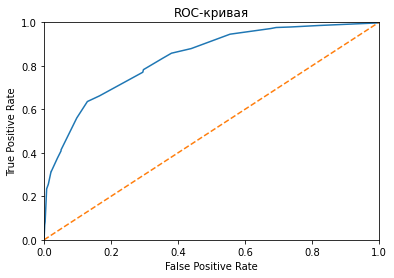

AUC-ROC: 0.8355422436292389


In [78]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [79]:
#обученная на увеличенной выборке
best_tree(features_upsampled, target_upsampled, features_test, target_test, 21, None)

F1-мера наилучшей модели = 0.5809128630705395 , max_depth: 5


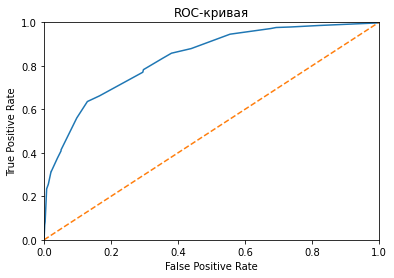

AUC-ROC: 0.8355422436292389


In [80]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = DecisionTreeClassifier(max_depth=5, class_weight=None, random_state=12345)
model.fit(features_upsampled, target_upsampled)
auc_roc(model, features_test, target_test)

In [81]:
#обученная на уменьшенной выборке
best_tree(features_downsampled, target_downsampled, features_test, target_test, 21, None)

F1-мера наилучшей модели = 0.608066184074457 , max_depth: 5


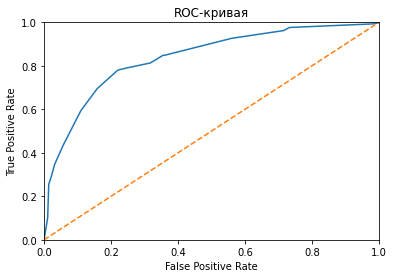

AUC-ROC: 0.8377856330135773


In [82]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = DecisionTreeClassifier(max_depth=5, class_weight=None, random_state=12345)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_test, target_test)

In [83]:
#С изменённым порогом классификации
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.46
f1 = f1_score(target_test, predicted_test)
print('F1-мера =',f1)

F1-мера = 0.5809128630705395


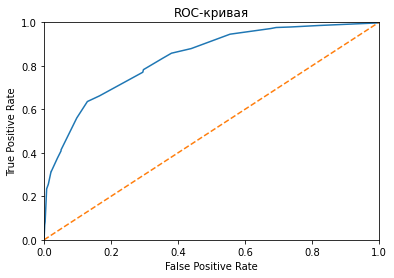

AUC-ROC: 0.7482172062644007


In [84]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Решающего дерева" с изменённым порогом классификации
model = DecisionTreeClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.46

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_test, predicted_test))

**Случайный лес**

In [85]:
#Без учёта дисбаланса
model = RandomForestClassifier(n_estimators=70, max_depth=17, class_weight = None, random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('F1-мера:', f1_score(target_test, predicted_test))

F1-мера: 0.5038639876352395


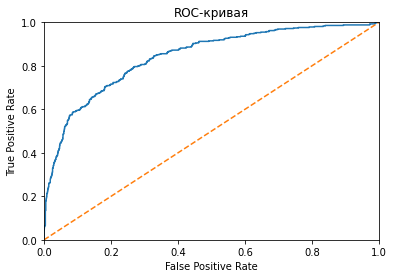

AUC-ROC: 0.8422851540540661


In [86]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = RandomForestClassifier(n_estimators=70, max_depth=17, class_weight = None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [87]:
#Со сбалансированными весами классов
model = RandomForestClassifier(n_estimators=60, max_depth=9, class_weight = 'balanced', random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('F1-мера:', f1_score(target_test, predicted_test))

F1-мера: 0.6020066889632107


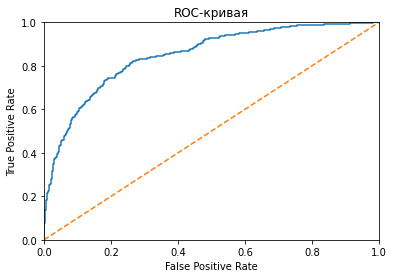

AUC-ROC: 0.8487642244978421


In [88]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = RandomForestClassifier(n_estimators=60, max_depth=9, class_weight = 'balanced', random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [89]:
#обученная на увеличенной выборке
model = RandomForestClassifier(n_estimators=50, max_depth=14, class_weight = None, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('F1-мера:', f1_score(target_test, predicted_test))

F1-мера: 0.5980861244019139


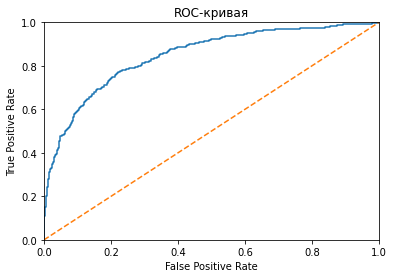

AUC-ROC: 0.8475424654946775


In [90]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = RandomForestClassifier(n_estimators=50, max_depth=14, class_weight = None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [91]:
#обученная на уменьшенной выборке
model = RandomForestClassifier(n_estimators=80, max_depth=9, class_weight = None, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('F1-мера:', f1_score(target_test, predicted_test))

F1-мера: 0.5834862385321101


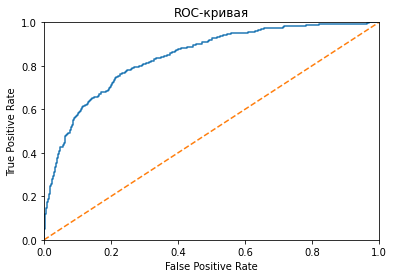

AUC-ROC: 0.8414906359293088


In [92]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = RandomForestClassifier(n_estimators=80, max_depth=9, class_weight = None, random_state=12345)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_test, target_test)

In [93]:
#С изменённым порогом классификации
model = RandomForestClassifier(n_estimators = 70, max_depth=17, random_state=12345)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.36
f1 = f1_score(target_test, predicted_test)
print('F1-мера =',f1)

F1-мера = 0.6120906801007556


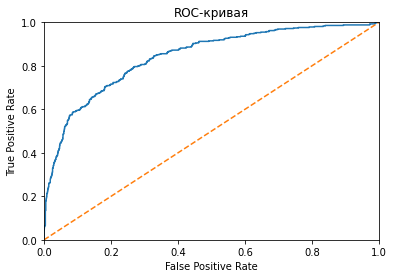

AUC-ROC: 0.7466506563769074


In [94]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Случайного леса" с изменённым порогом классификации
model = RandomForestClassifier(n_estimators = 70, max_depth=17, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.36

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_test, predicted_test))

Логистическая регрессия

In [95]:
#Без учёта дисбаланса
best_regression(features_train, target_train, features_test, target_test, None)

F-1 мера = 0.2778


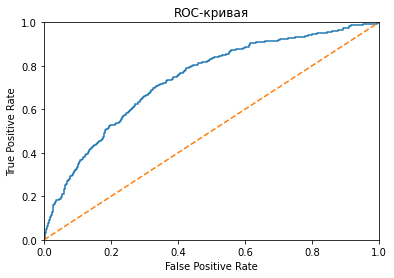

AUC-ROC: 0.7372033861463023


In [96]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = LogisticRegression(solver='liblinear', class_weight = None, random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [97]:
#Со сбалансированными весами классов
best_regression(features_train, target_train, features_test, target_test, 'balanced')

F-1 мера = 0.4792


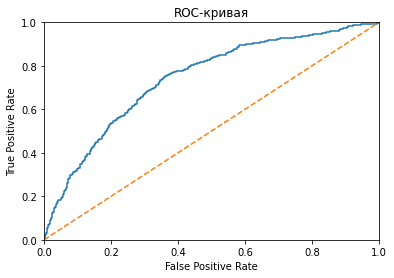

AUC-ROC: 0.7400081850357758


In [98]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = LogisticRegression(solver='liblinear', class_weight = 'balanced', random_state=12345)
model.fit(features_train, target_train)
auc_roc(model, features_test, target_test)

In [99]:
#Обученная на увеличенной выборке
best_regression(features_upsampled, target_upsampled, features_test, target_test, None)

F-1 мера = 0.4796


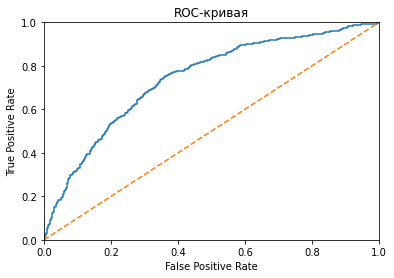

AUC-ROC: 0.739994693218563


In [100]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = LogisticRegression(solver='liblinear', class_weight = None, random_state=12345)
model.fit(features_upsampled, target_upsampled)
auc_roc(model, features_test, target_test)

In [101]:
#Обученная на уменьшенной выборке
best_regression(features_downsampled, target_downsampled, features_test, target_test, None)

F-1 мера = 0.4720


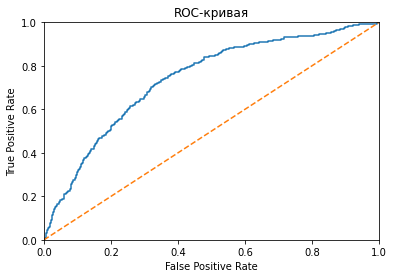

AUC-ROC: 0.7379604270010238


In [102]:
#Строим ROC-кривую и считаем значение AUC-ROC
model = LogisticRegression(solver='liblinear', class_weight = None, random_state=12345)
model.fit(features_downsampled, target_downsampled)
auc_roc(model, features_test, target_test)

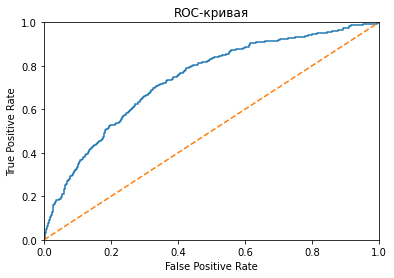

AUC-ROC: 0.6606080911926917


In [103]:
#Строим ROC-кривую и считаем значение AUC-ROC для "Логистической регрессии" с изменённым порогом классификации
model = LogisticRegression(solver='liblinear', class_weight=None, random_state=12345)
model.fit(features_train, target_train)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > 0.26

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 
print("AUC-ROC:", roc_auc_score(target_test, predicted_test))

**Вывод**: На тестовой выборке максимального значения F1-меры в 0.612 показала модель "Случайный лес" с изменением порога классификации до 0.36 со следующими гиперпараметрами: n_estimators = 70, max_depth=17